# Admin~

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch, freqz, butter, filtfilt
import seaborn as sns

In [ ]:
!wget https://github.com/MBSI-Inc/IEEE_BCI_Workshop/raw/main/Data.zip
!unzip /content/Data.zip

# Import the dataset
events = pd.read_csv('/content/Data/100Hz/data_set_IVb_al_train_mrk.txt', header=None, sep='\t')
events = np.squeeze(events.values.tolist())

# Import all the electrodes 
electrodes_all = pd.read_csv('/content/Data/100Hz/data_set_IVb_al_train_nfo.txt', header=None, delimiter=', ', nrows=1, engine='python')
electrodes_all = np.squeeze(electrodes_all.values.tolist())

# Multiple Channels are read from the data sheet
C1_ind = np.where(electrodes_all=='C1')[0][0]
C2_ind = np.where(electrodes_all=='C2')[0][0]
C3_ind = np.where(electrodes_all=='C3')[0][0]
C4_ind = np.where(electrodes_all=='C4')[0][0]
Cz_ind = np.where(electrodes_all=='Cz')[0][0]

Fp1_ind = np.where(electrodes_all=='Fp1')[0][0]
Fp2_ind = np.where(electrodes_all=='Fp2')[0][0]
F7_ind = np.where(electrodes_all=='F7')[0][0]
F3_ind = np.where(electrodes_all=='F3')[0][0]
Fz_ind = np.where(electrodes_all=='Fz')[0][0]
F4_ind = np.where(electrodes_all=='F4')[0][0]
F8_ind = np.where(electrodes_all=='F8')[0][0]

# T3_ind = np.where(electrodes_all=='T3')[0][0]
# T4_ind = np.where(electrodes_all=='T4')[0][0]
# T5_ind = np.where(electrodes_all=='T5')[0][0]
# T6_ind = np.where(electrodes_all=='T6')[0][0]

P3_ind = np.where(electrodes_all=='P3')[0][0]
P4_ind = np.where(electrodes_all=='P4')[0][0]
Pz_ind = np.where(electrodes_all=='Pz')[0][0]

O1_ind = np.where(electrodes_all=='O1')[0][0]
O2_ind = np.where(electrodes_all=='O2')[0][0]

data = pd.read_csv('/content/Data/100Hz/data_set_IVb_al_train_cnt.txt', names=electrodes_all, delimiter='\t')
data = data.to_numpy()

# **1. Background**

Welcome to the BCI Workshop! By the end of this workshop, you should understand the basic process of how we can take electrical signals measured from brain activity to make decisions using a computer.

The field of Brain Computer Interfaces is very broad and multidisciplinary. This workshop will focus mainly on the signal processing component of building BCI which is done via code. Here we will be demonstrating these methods in Python.

The workshop will be broken down into 4 main topics: 

- Signal Detection
- Signal Processing & Analysis
- Feature Selection
- Classification


# **2. Signal Detection**
## **2.1 Functional Organisation of the Brain**

The structure of the brain is highly organised. Although complex thoughts, ideas and memories are distributed throughout many regions of the brain, there are certain regions that have specialised function. \[**Think:** How could we have discovered these brain maps?]

![](https://www.dana.org/wp-content/uploads/2019/08/anatomy-function-brain-areas-basics-aug-2019-2024.jpg)

*Figure 1 - Functional Areas of the Cerebarl Cortex*


\



## **2.2 EEG**

Electroencephalography is a way of detecting the electrical activity of neurons at the cortical surface just beneath the scalp. The collective activity of a population of cortical pyramidal neurons create small electrical fields which are the signals that are detected by electrodes. However, the electrodes not only detect the signals from the brain that are of interest, but also surrounding noise and intefering signals as well. In most applications, we need to be careful about the design of the sensing circuits we use to detect physiological signals in order to increase the signal to noise ratio. 

The figure below shows where the electrodes are placed on the scalp in order to detect the signals. Note the letters and numbers are used to refer to particular brain regions for example P - Parietal. 

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1bSLdkZ_Zm5MKQ-kK82WNze-8EKq4_5mkwA&usqp=CAU)

*Figure 2 - EEG Electrode Placement*



### **Question 1**
There are three electrodes will be used for collecting the EEG signal. In Figure 2, 19 electrodes are availiable for you to select. Which three electrodes do you think are most suit for our task? \[Hint: Try thinking which cortex is reponsible for executing voluntary movements.]


#### Answer:

Type Here...

# **3. Signal Processing & Analysis**
### **3.1 Frequency and Power Spectral Density (PSD)**

What is frequency? 
Frequency is the number of occurrences of a repeating event per unit of time (Wikipedia). In general, we collect the EEG signal by placing electrode at the position we desire and record them in time domain. The signal will be made up of many signals of a single frequency as shown by the red signal which is decomposed into blue signals.

In order to analyse our recorded signal, a very useful trick is to perform a mathematical operation called the Fourier Transform that converts the signal from the time domain to the frequency domain. Intuitively, you can think of the peaks (shown as straight vertical lines) to represent the magnitude of the contributing frequency component of the whole signal.

\
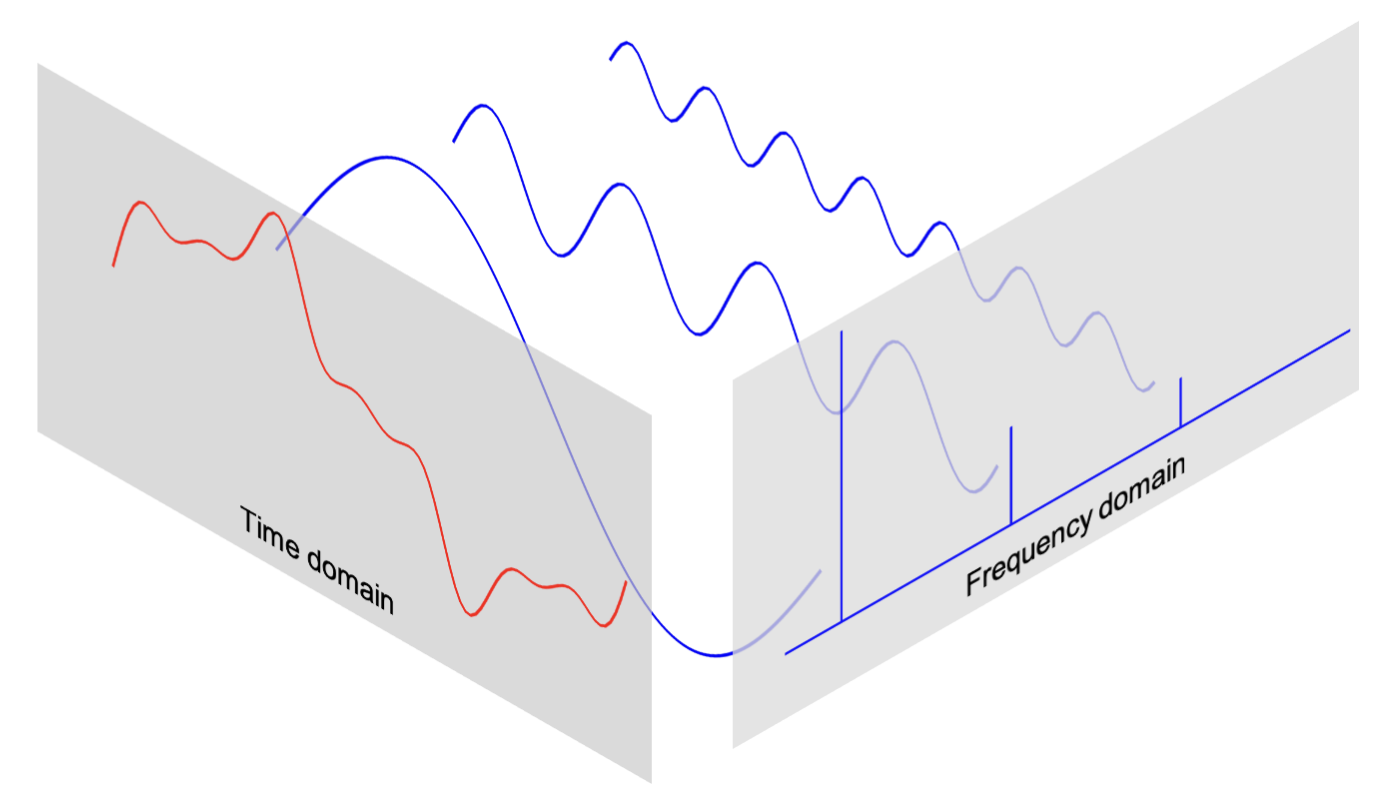
Figure 3. Signals in Time Domain and Frequency Domain

\
What information can we obtain from the frequency spectra of the signal?

We assume that certain signals from the brain have common signatures. By looking at the spectral shape of the signal, we might be able to distinguish one signal from another. Signals in real life occur over continuous time, but when we measure a signal and work with it on the computer, the signal needs to be discretised by sampling the signal as a certain rate. We call this the *sampling frequency*. The PSD is a useful way to compare signals sampled at different rates on a common scale. In other words, the PSD describes how the power of the signal is distributed over frequency, whilst the Fourier Transform shows the spectral content of the signal.


Now let's see how we can process the signal in practice!

# **3.2 Raw EEG Signal**

Please plot the raw signals measured by the two electodes found in Question 1.

In [ ]:
fst_ind = # FILL HERE, 1st electrode
snd_ind = # FILL HERE, 2nd electrode

fst = data[:, fst_ind] 
snd = data[:, snd_ind] 

fs = # FILL HERE
start = # FILL HERE
seconds = # FILL HERE
stop = start + (fs*seconds) 
t = [i/fs for i in range(start, stop)] # Generate the time vector

plt.figure(figsize=(30,14))
fig, axs = plt.subplots(2, figsize=(15,7))
fig.suptitle('Figure 4: Raw data', fontsize=28)
axs[0].plot(t, fst[start:stop])
axs[1].plot(t, snd[start:stop])

axs[1].set_xlabel('Time [s]', fontsize=26)
axs[0].set_ylabel('Voltage [uV]', fontsize=26)

# **3.3 Motor imagery**
Motor imagery is the act of thinking about moving a limb without actually doing so. This could be:
1. Opening and closing your hand
2. Moving your toe forwards and backwards

\


# **3.4 Motor imagery features**
Frequencies between 7-13Hz will **change in power** depending on what kind of motor imagery is being imagined. 

This means that we can use the power of these frequencies to infer which motor imagery action was imagined. We can then use these different power spectrum signatures as control signals. 

\

## **3.4.1 Hand Motor Imagery Power Spectral Density For Electrodes C3 and C4**
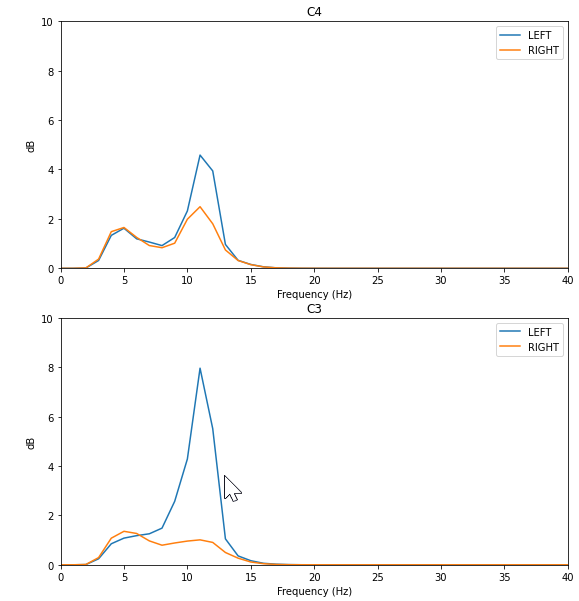

Figure 5. Hand Motor Imagery Power Spectral Density For Electrodes C3 and C4

\

As you can see, by performing right and left hand motor imagery we see a very large change in the frequency powers between 7-13Hz!

# **3.5 Signal Processing & Analysis Implementation**
We have 2 channels, C3 and C4, with data sampling at 100Hz

## Trial structure
* The experiment is composed of 210 trials, 105 for right food motor imagery, and 105 for left hand motor imagery. 

* The participants are instructed to think about moving their respective foot or hand for **3 seconds** when a cue pops up on the screen. 

* There is also a 1.25-1.75s break in between these trials to give the participant a bit of a break

## Getting the trial window
For each trial, get the trial window from 0-3s for each channel.

We will be storing this in an array of size [n_trials, n_channels, n_samples]

Remembering that we are sampling at 100Hz, so 3s worth of data is 300 samples

That means our array is size [210, 2, 300]

\

## Getting Trial label
Each trial will have a label to tell you whether it is right foot or left hand that was imagined. 

* Right foot = 1
* Left hand = -1

Note: you might be wondering, if we already know whether the participant was thinking left hand or right foot, then why are we doing this? The analysis we are going to be doing is called Supervised Machine Learning. We will be taking our labelled PSDs and training a model/classifier that we will then use to predict the label based on future PSDs that we do not know the label of. In other words, we will be learning the statistical structure and difference of the PSD signatures by using examples of data we have already obtained. 

This is a common approach which companies like Google and Microsoft use to decide whether an incoming email is spam or not. Here we are classifying LEFT vs RIGHT. We call this binary classification as there are two possible labels. 

In [ ]:
# Define our parameters
n_events = events.shape[0]
n_channels = # FILL HERE
n_seconds =  # FILL HERE
sf = # FILL HERE
n_samples = # FILL HERE 

In [ ]:
# Intitiate some empty arrays
X = np.zeros([n_events, n_channels, n_samples]) #[201, 2, 300] stores the signal in time domain
y = np.zeros(n_events) #stores the label of the signal (RIGHT vs LEFT)

# Loop through and add in the data
for i in range(n_events):
    start_sample = events[i][0]
    
    trial_label = events[i][1]
    trial = data[start_sample:start_sample + n_samples, [C3_ind, C4_ind]]

    X[i,:,:] = trial.T
    y[i] = trial_label

print('Shape of our dataset: ', X.shape)
print("Trial labels: ", y)

# **3.2 Calculating the PSD for each trial for each channel**
We now need to calculate the power spectral density of our data which is currently in the time domain.

Because our data is sampled at 100Hz, we will calculate the PSD for each frequency up to half the sampling frequency i.e. 50Hz. This is known as the **Nyquist Frequency**. The significance of doing this is again because we are taking a continuous time signal and forming a digital, discrete representation of it. Two samples per cycle are needed to sufficiently identify the original signal. The implication of the Nyquist Sampling Theorem means that if we must sample our signal at atleast double the largest frequency we are interested in. Otherwise we can have issues known as *aliasing*. 

![](https://docs-be.ni.com/bundle/labview/page/lvanlsconcepts/guid-932173fe-d89c-4bc0-a3ed-980f99bcc06b-help-web.png?_LANG=enus)

Note: 50Hz is sufficient for our application because the bandwidth for signal change we are interested in is 7-13Hz. 

This means our data PSD array will be of size [n_trials, n_channels, 51]

In [ ]:
# Initiate empty array
X_psd = np.zeros([n_events, n_channels, 51])

# Calculate PSD for each channel for each trial
for trial_ind in range(n_events):
    for ch_ind in range(n_channels):
        channel_trial = X[trial_ind, ch_ind, :]
        p, f = plt.psd(channel_trial, Fs=sf, NFFT=sf)
        X_psd[trial_ind, ch_ind, :] = 10*np.log10(p) # this formula converts the power into dB

# Below you will see a plot of all the PSDs calculated

## 3.2.1 Visualising our dataset
So knowing that we have left hand and right foot motor imagery, lets see what their frequency powers look like



In [ ]:
# Separate the trial types
X_psd_L = X_psd[np.where(y==-1)]
X_psd_R = X_psd[np.where(y==1)]

# Get the average PSD for each
X_psd_L_avg = np.mean(X_psd_L, axis=0)
X_psd_R_avg = np.mean(X_psd_R, axis=0)

In [ ]:
# Plot the average PSD
# We know what our frequencies are from the code above: freqs_sliced
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16,4))
axs[0].plot(f, X_psd_L_avg[0,:], 'tab:blue')
axs[0].plot(f, X_psd_R_avg[0,:], 'tab:orange')
axs[0].set_title('Figure 6a: PSD of trials for electrode C3')
axs[0].set(xlabel='Frequency (Hz)', ylabel='dB')
axs[0].legend(['Left hand', 'right foot'])

axs[1].plot(f, X_psd_L_avg[1,:], 'tab:blue')
axs[1].plot(f, X_psd_R_avg[1,:], 'tab:orange')
axs[1].set_title('Figure 6b: PSD of trials for electrode C4')
axs[1].set(xlabel='Frequency (Hz)')
axs[1].legend(['Left hand', 'right foot'])

# **4. Feature selection**
We only care for the frequencies that are relevant to the motor imagery, so we should remove all the other data so that we reduce the risk of the model classifying on artefacts in the data!

## Question 2
What range of frequencies do you think is the most significant in motor imagery (Figure 6)? 

Please fill the 'low' and 'high' variables in the following code block.

In [ ]:
low = # FILL HERE
high = # FILl HERE

low_ind = np.where(f == low)
high_ind = np.where(f == high)

X_psd_cut = X_psd[:,:,low_ind[0][0]:high_ind[0][0]+1]

print("Final dataset: ", X_psd_cut.shape)

# **5. Classifying**
Now we can use some basic machine learning to train a model so that it can separate between the two classes. 

The steps to perform a basic train and classify pipeline:
1. Split the data into a train and test set, for us this means we will take the first 66% of the data and classify on the last 33% of the data
2. Fit the model to the training data
3. Classify on the test data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Flatten our dataset
X_psd_flatten = X_psd_cut.reshape([X_psd_cut.shape[0],
                                   X_psd_cut.shape[1] * X_psd_cut.shape[2]])
                                   

In today's workshop, we are using the Logistic Regression Classifier. More information about Logistic Regression can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

\

train_test_split\(   ) gives four outputs:
- X_train: traning input dataset
- X_test: testing input dataset
- Y_train: training output dataset
- y_test: testing output dataset



## Question 3
In the function model.fit(), two inputs are required. What are the two datasets that should be used to train the model?


\

In the function model.predict(), one input is required. What dataset is used to to predict the results with the trained model? 

\
\[Hint: datasets can be chosen from the above list]

In [ ]:
model = LogisticRegression(max_iter=1000)
size = # FILL HERE [0-1]
X_train, X_test, y_train, y_test = train_test_split(X_psd_flatten, y, test_size=size, shuffle=False)

model.fit(# FILL HERE, 
          # FILL HERE)

y_pred = model.predict(# FILL HERE)

score = accuracy_score(y_test, y_pred)
print("Data accuracy: ", score * 100)

In real practice, different statistical models may be used and tested to try improve the accuracy or performance of the classifier. Once we have a classifier that works quite well, we can record a patient's brain activity in real time and predict whether they were thinking LEFT vs RIGHT. We can then use these two signatures and commands to steer a wheelchair for example. 